# Overall Statsitical Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import os.path
from functools import reduce
import tempfile


In [2]:
sys.path.append('..')
from utils.kaggle import get_global_parameters, calc_contest_metric
from utils.preprocessing import encode_mean_level
from utils.mlflow_experiments import retrieve_artifacts
global_parms = get_global_parameters()


In [3]:
pd.options.display.max_rows = 1000


## Retrieve sample data for eda

In [4]:

# Run Id for sample data
#RUN_ID='4b20d2c58c6f44beb36528a1542f9551'  #20%
RUN_ID='8300b1d2a03947b1af77563867bdc292'  #50%

tmpdir = tempfile.mkdtemp()

retrieve_artifacts(RUN_ID, '.', tmpdir)


train_samp = pd.read_pickle(os.path.join(tmpdir,'sample.pkl'))
train_samp.shape

(295270, 434)

In [5]:
train_samp = train_samp.drop(['TransactionID'],axis=1)

## Split numeric and character variables

In [6]:
char_predictors = [col for col in train_samp.columns if train_samp[col].dtype.name == 'object']

In [7]:
num_predictors = [col for col in train_samp.columns if train_samp[col].dtype.name != 'object']

## Dataframe for numeric perdictors

In [8]:
num_df = train_samp[num_predictors]
num_df.shape

(295270, 402)

In [9]:
def calc_pct_missing(df):
    return df.isnull().sum()/df.shape[0] * 100

def calc_overall_stats(df):
    desc = df.describe().T
    skew = pd.DataFrame(df.skew(), columns=['skew'])
    nunique = pd.DataFrame(df.nunique(), columns=['nunique'])
    pct_missing = pd.DataFrame(df.isnull().sum()/train_samp.shape[0] * 100, columns=['pct_missing']) 
    dtype = pd.DataFrame(df.dtypes, columns=['dtype'])

    return reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), 
          [dtype, nunique, pct_missing, skew, desc])
    
def calc_isFraud_stats(df):
    desc = df.groupby('isFraud').describe().stack(0).swaplevel(0,1).sort_index()
    skew = pd.DataFrame(df.groupby('isFraud').skew().stack(0).swaplevel(0,1).sort_index(), columns=['skew'])
    nunique = pd.DataFrame(df.groupby('isFraud').nunique().stack(0).swaplevel(0,1).sort_index(), columns=['nunique'])

    return reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), 
          [ nunique, skew, desc])[['nunique','skew', 'count', 'mean', 'std','min', '25%', '50%', '75%', 'max']]
# pct_missing,

In [10]:
numeric_stats = calc_overall_stats(num_df)
numeric_stats

,dtype,nunique,pct_missing,skew,count,mean,std,min,25%,50%,75%,max
isFraud,int64,2,0.000000,5.046689,295270.0,3.517120e-02,1.842127e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
TransactionDT,int64,290920,0.000000,0.134336,295270.0,7.365475e+06,4.618203e+06,86401.000,3.025518e+06,7.265136e+06,1.124366e+07,1.581113e+07
TransactionAmt,float64,14437,0.000000,14.264346,295270.0,1.350622e+02,2.398777e+02,0.251,4.326100e+01,6.850000e+01,1.250000e+02,3.193739e+04
card1,int64,11221,0.000000,-0.037667,295270.0,9.881126e+03,4.901541e+03,1001.000,6.019000e+03,9.633000e+03,1.417000e+04,1.839500e+04
card2,float64,500,1.541640,-0.201838,290718.0,3.627213e+02,1.577568e+02,100.000,2.150000e+02,3.610000e+02,5.120000e+02,6.000000e+02
card3,float64,104,0.278389,2.040667,294448.0,1.532280e+02,1.135705e+01,100.000,1.500000e+02,1.500000e+02,1.500000e+02,2.310000e+02
card5,float64,104,0.733227,-1.224557,293105.0,1.992900e+02,4.121702e+01,100.000,1.660000e+02,2.260000e+02,2.260000e+02,2.370000e+02
addr1,float64,252,11.167067,0.373086,262297.0,2.905553e+02,1.017547e+02,100.000,2.040000e+02,2.990000e+02,3.300000e+02,5.400000e+02
addr2,float64,62,11.167067,-14.462594,262297.0,8.679658e+01,2.727156e+00,10.000,8.700000e+01,8.700000e+01,8.700000e+01,1.020000e+02
dist1,float64,2357,59.733126,5.189797,118896.0,1.175023e+02,3.699093e+02,0.000,3.000000e+00,8.000000e+00,2.400000e+01,1.028600e+04


In [11]:
numeric_stats_by_isFraud = calc_isFraud_stats(num_df)
numeric_stats_by_isFraud

nunique        skew     count          mean  \
               isFraud                                                
C1             0           1034   24.695639  284885.0  1.330356e+01   
               1            373   13.637097   10385.0  3.508801e+01   
C10            0            769   25.990862  284885.0  4.778465e+00   
               1            177   13.982958   10385.0  1.892961e+01   
C11            0            953   22.997689  284885.0  9.738379e+00   
               1            255   13.081791   10385.0  2.327578e+01   
C12            0            608   28.273214  284885.0  3.617597e+00   
               1            215   14.796937   10385.0  1.812932e+01   
C13            0           1285    8.735560  284885.0  3.271815e+01   
               1            281   11.948761   10385.0  2.408888e+01   
C14            0            811   16.683356  284885.0  8.185011e+00   
               1            169   12.091831   10385.0  9.983149e+00   
C2             0            834   24.542872  284885.0  1.417161e+01   
               1            423   12.697097   10385.0  4.502927e+01   
C3             0             23   87.889105  284885.0  6.079646e-03   
               1              2   58.818928   10385.0  2.888782e-04   
C4             0            755   22.839785  284885.0  3.699928e+00   
               1            164   12.568150   10385.0  1.464901e+01   
C5             0            306    5.743460  284885.0  5.691311e+00   
               1             91   12.923642   10385.0  1.366298e+00   
C6             0            899   20.226379  284885.0  8.755989e+00   
               1            203   12.427487   10385.0  1.645219e+01   
C7             0            592   27.984811  284885.0  2.565856e+00   
               1            143   14.888194   10385.0  1.163794e+01   
C8             0            688   26.936860  284885.0  4.612770e+00   
               1            231   14.290354   10385.0  2.073452e+01   
C9             0            203    5.641438  284885.0  4.547080e+00   
               1             80   11.435534   10385.0  1.691767e+00   
D1             0            641    1.771826  284254.0  9.628139e+01   
               1            506    3.486136   10360.0  3.822278e+01   
D10            0            783    1.365254  248794.0  1.261391e+02   
               1            547    2.759890    8422.0  5.285051e+01   
D11            0            671    1.035914  152258.0  1.478429e+02   
               1            466    1.828318    3069.0  8.925024e+01   
D12            0            619    2.401438   28686.0  5.573325e+01   
               1            304    2.825036    3810.0  4.274383e+01   
D13            0            507    4.991540   27673.0  1.933831e+01   
               1            102    7.614288    3432.0  6.354604e+00   
D14            0            735    2.582573   27602.0  5.786066e+01   
               1            299    2.662757    3660.0  5.356749e+01   
D15            0            818    0.933673  242404.0  1.662604e+02   
               1            587    2.087010    8227.0  7.859827e+01   
D2             0            641    0.994621  150806.0  1.720798e+02   
               1            452    2.292562    3959.0  7.545744e+01   
D3             0            622    4.492286  158858.0  2.876974e+01   
               1            201    6.178765    4821.0  1.274258e+01   
D4             0            771    1.149273  203464.0  1.422338e+02   
               1            546    2.187364    7324.0  7.136906e+01   
D5             0            659    3.351689  134739.0  4.319242e+01   
               1            261    5.622816    5491.0  1.424622e+01   
D6             0            763    2.195229   32828.0  7.251203e+01   
               1            311    2.786226    3876.0  4.413596e+01   
D7             0            543    2.694090   16566.0  4.713769e+01   
               1            169    5.626358    2906.0  1.153476e+01   
D8             0           9082    2.099891   33

In [12]:
numeric_stats_by_isFraud.loc['card2']

,nunique,skew,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,,,
0,500,-0.200717,280540.0,362.649472,157.674901,100.0,215.0,361.0,512.0,600.0
1,286,-0.232482,10178.0,364.701906,159.991723,100.0,204.0,375.0,514.0,599.0


In [13]:
num_df[['isFraud','C1']].head()

,isFraud,C1
57903,0,1.0
400901,0,1.0
235736,0,2.0
200779,0,2.0
226515,0,1.0


In [14]:
y = np.log(num_df.C1 + 1)

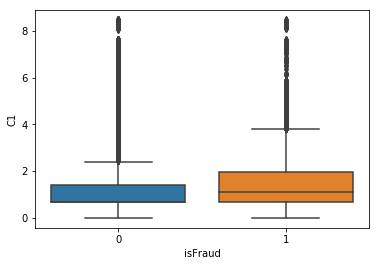

In [15]:
sns.boxplot(num_df.isFraud,y)

In [16]:
type(numeric_stats)

pandas.core.frame.DataFrame

In [17]:
numeric_stats['skew'].describe()

count    402.000000
mean      18.004248
std       32.988415
min     -139.331439
25%        2.956259
50%       10.691726
75%       23.278694
max      313.718026
Name: skew, dtype: float64

In [18]:
numeric_stats.loc[numeric_stats['std'] < 1]

,dtype,nunique,pct_missing,skew,count,mean,std,min,25%,50%,75%,max
isFraud,int64,2,0.000000,5.046689,295270.0,0.035171,0.184213,0.0,0.000000,0.000000,0.000000,1.000000
C3,float64,23,0.000000,89.425003,295270.0,0.005876,0.161956,0.0,0.000000,0.000000,0.000000,26.000000
D9,float64,24,87.275375,-0.585309,37572.0,0.560919,0.317079,0.0,0.208333,0.666666,0.833333,0.958333
V1,float64,2,47.394927,-139.331439,155327.0,0.999948,0.007176,0.0,1.000000,1.000000,1.000000,1.000000
V2,float64,8,47.394927,6.837524,155327.0,1.045459,0.241940,0.0,1.000000,1.000000,1.000000,8.000000
V3,float64,9,47.394927,5.342293,155327.0,1.078029,0.320311,0.0,1.000000,1.000000,1.000000,8.000000
V4,float64,7,47.394927,-0.409526,155327.0,0.846601,0.441511,0.0,1.000000,1.000000,1.000000,6.000000
V5,float64,7,47.394927,0.230032,155327.0,0.876634,0.476885,0.0,1.000000,1.000000,1.000000,6.000000
V6,float64,10,47.394927,6.956779,155327.0,1.046083,0.242792,0.0,1.000000,1.000000,1.000000,9.000000
V7,float64,10,47.394927,5.523024,155327.0,1.072833,0.304808,0.0,1.000000,1.000000,1.000000,9.000000


        isFraud           y     log_y
57903         0    0.000000  0.000000
400901        0    0.000000  0.000000
235736        0    0.000000  0.000000
200779        0  168.800003  5.134621
226515        0  114.949997  4.753159


/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


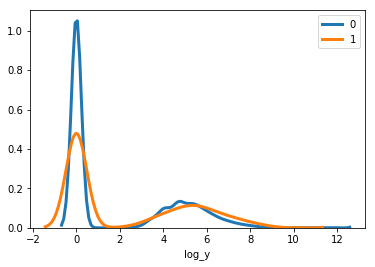

In [19]:
subset = num_df[['isFraud', 'V127']].copy()
subset.columns = ['isFraud', 'y']
subset['log_y'] = np.log(1 + subset['y'])
print(subset.head())

for isFraud in [0, 1]:
    # Draw the density plot
    sns.distplot(subset.loc[subset.isFraud == isFraud ,'log_y'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = isFraud)

In [20]:
def extract_data(c):
    df = num_df[['isFraud',c]].copy()
    df['var'] = c
    df.columns = ['isFraud', 'value', 'var']
    return df

def plot_log_density(*args, **kwargs):
    for isFraud in [0, 1]:
        idx = args[1] == isFraud
        this_data = np.log( 1 + args[0].loc[idx])
        sns.distplot(this_data, hist=False, kde = True,
                kde_kws={'linewidth':3}, label=isFraud)

#     sns.distplot(args[0])


In [21]:
idx = np.abs(numeric_stats['skew']) > 2.0

In [22]:
skewed_vars = numeric_stats.index[idx]

In [23]:
len(skewed_vars)

346

In [24]:
skewed_vars = list(set(skewed_vars) - set(['isFraud']))

In [25]:
len(skewed_vars)

345

In [26]:
skewed_vars = sorted(skewed_vars)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


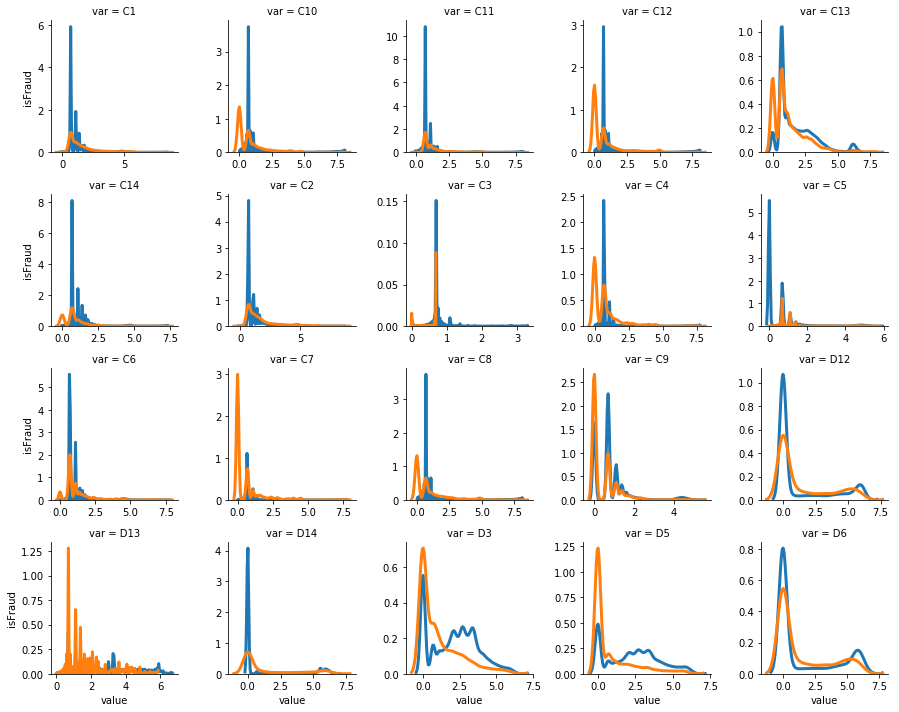

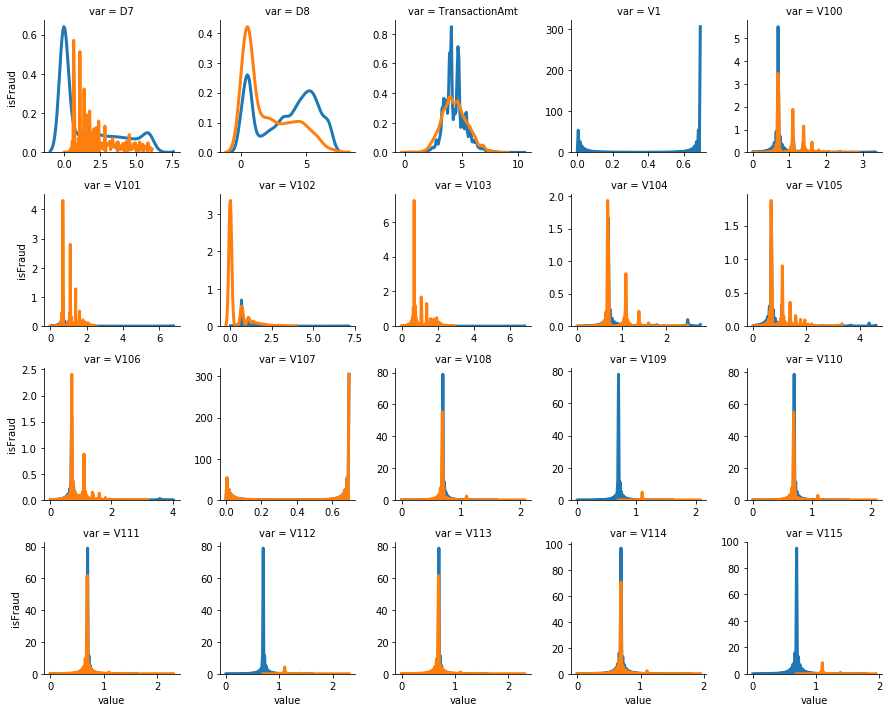

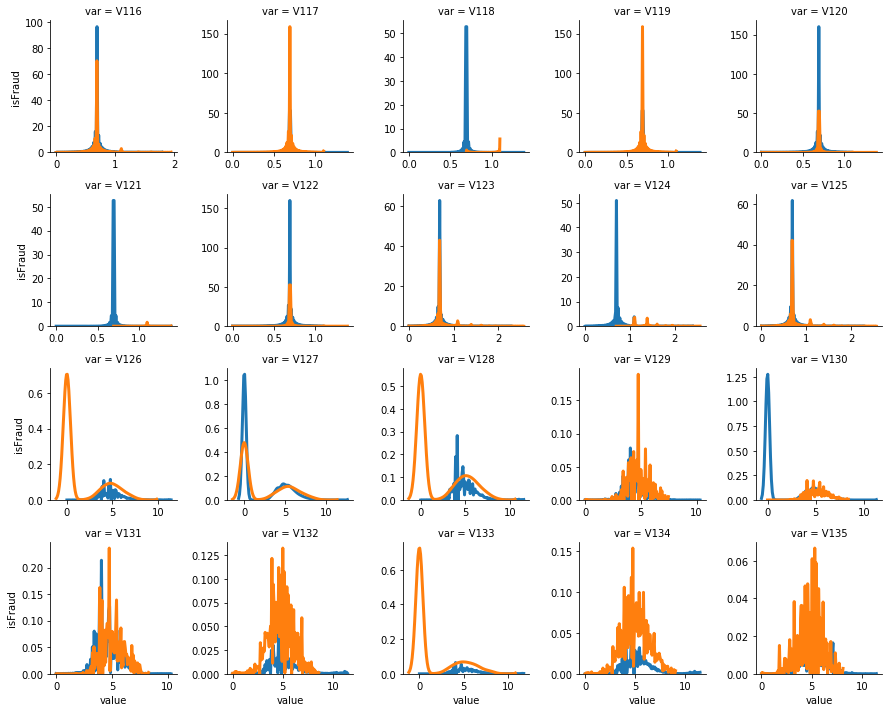

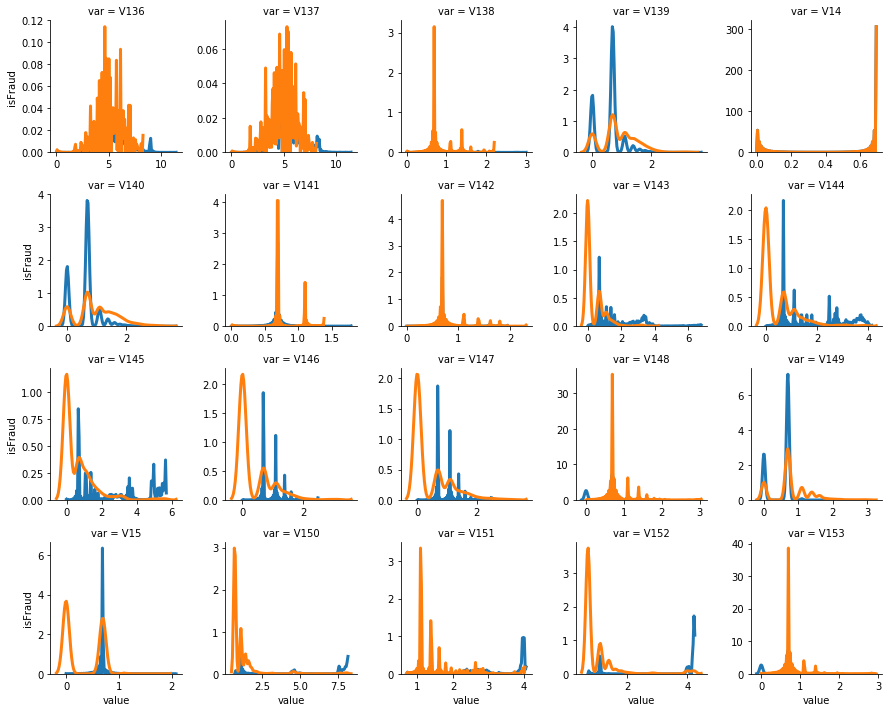

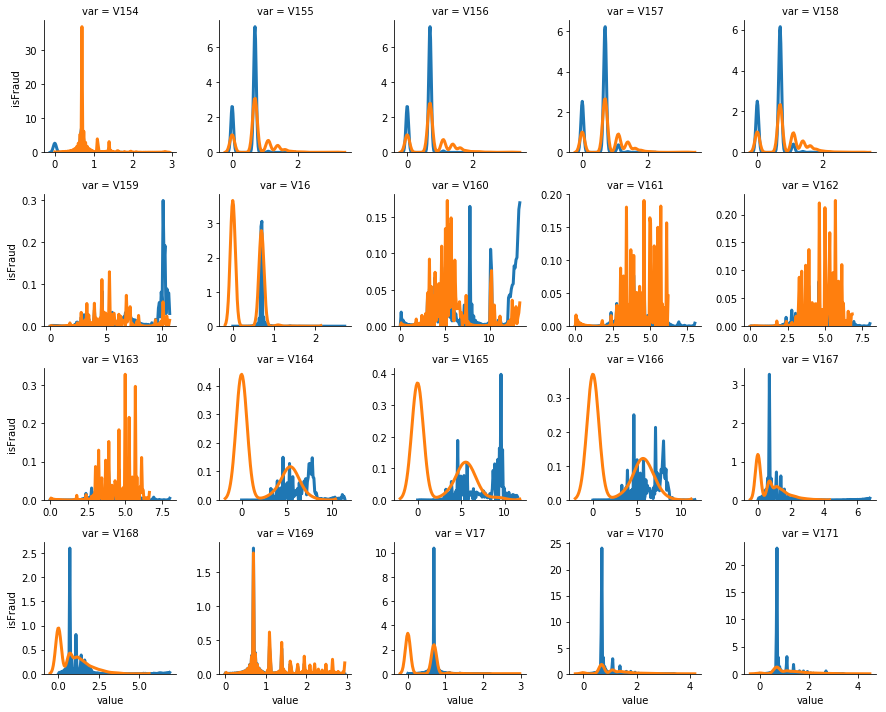

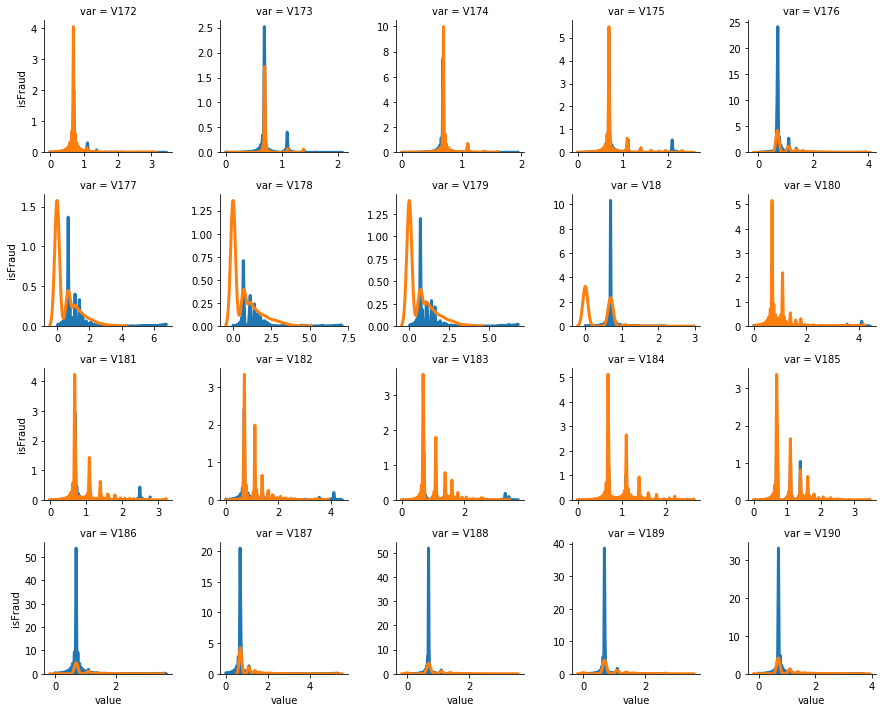

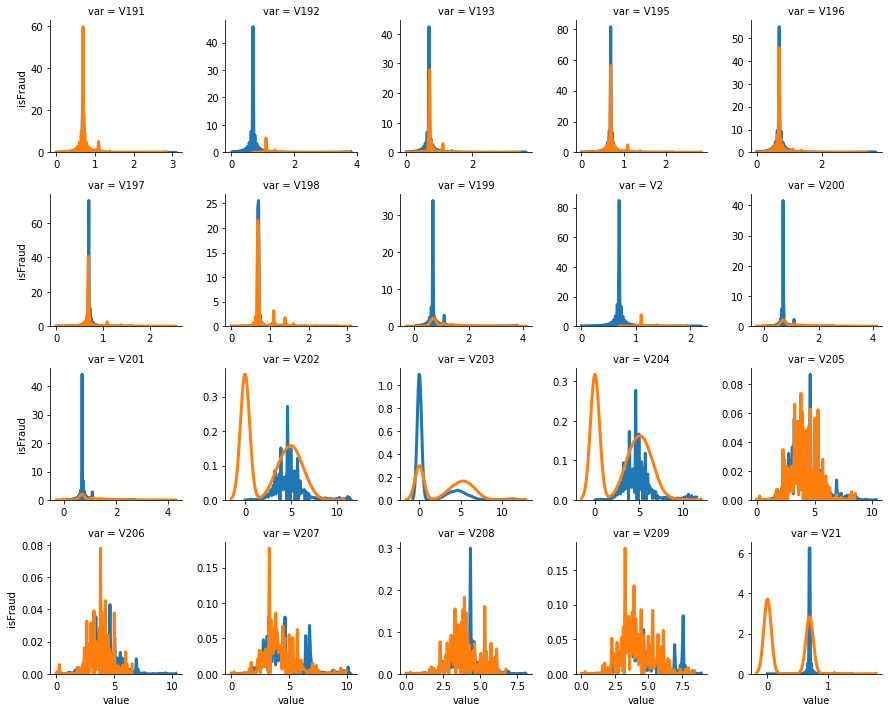

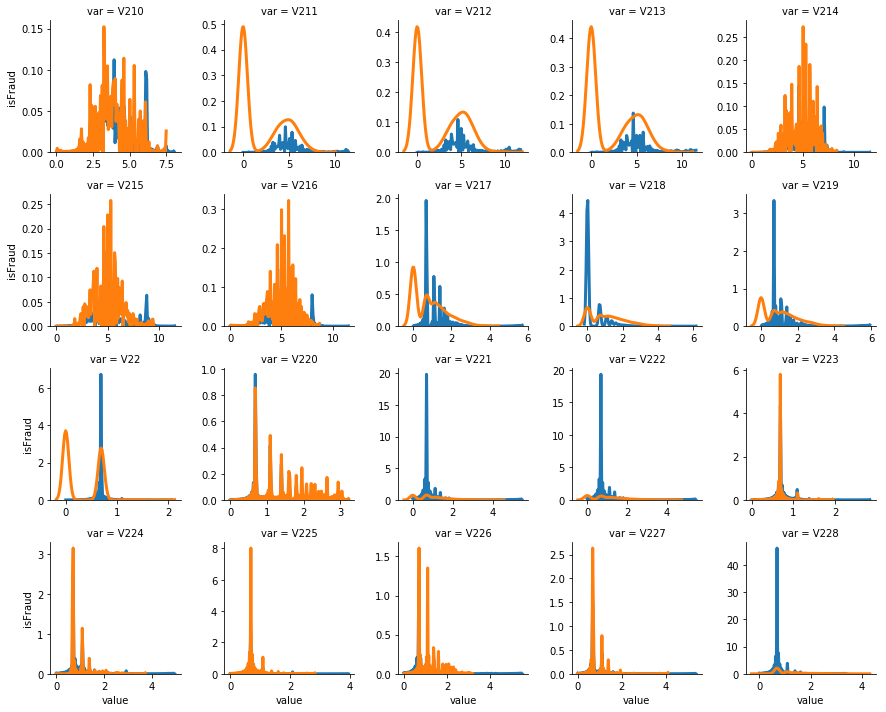

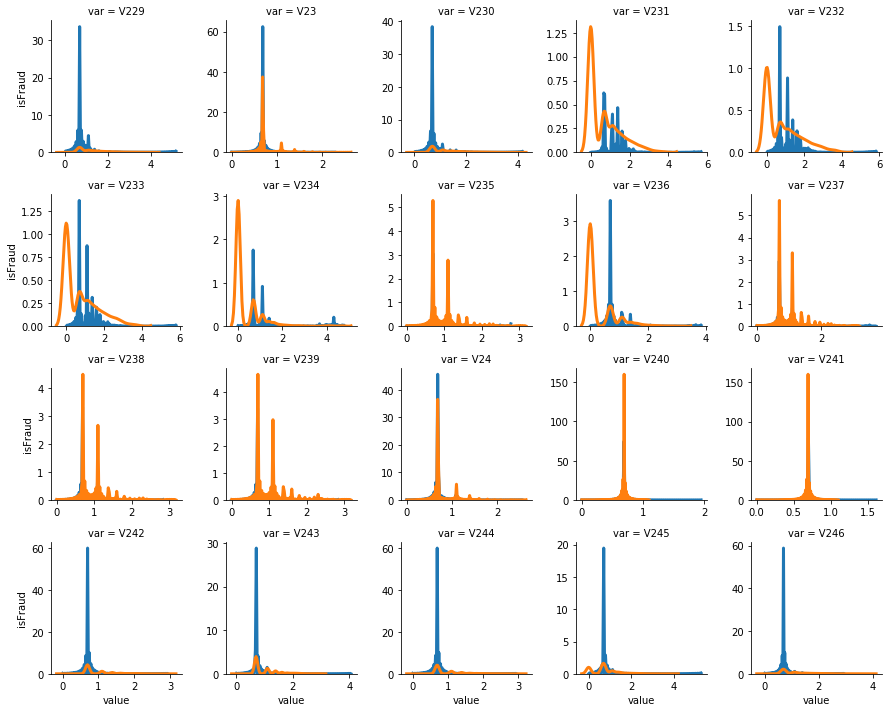

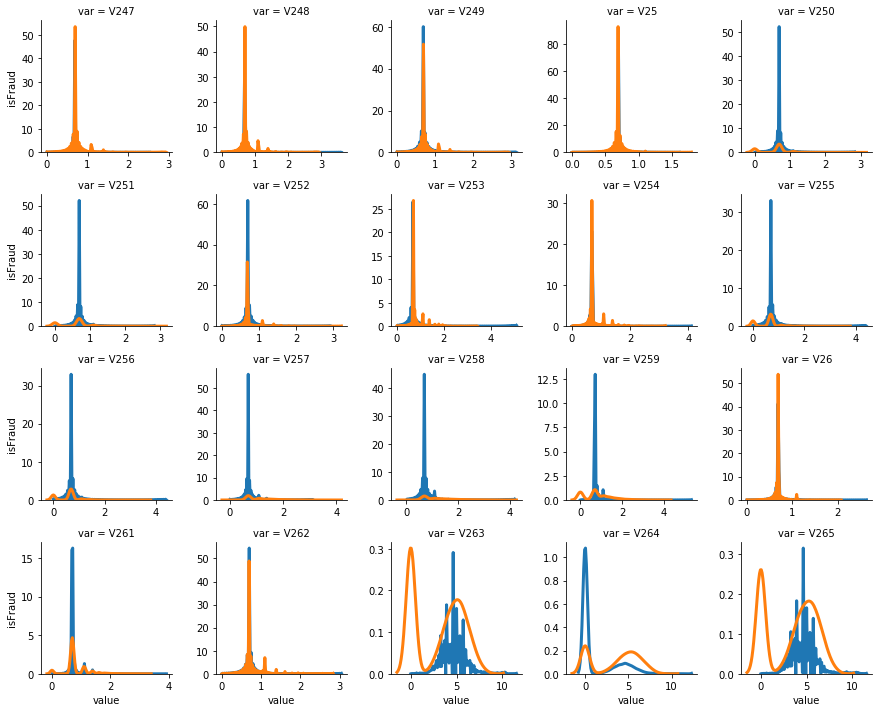

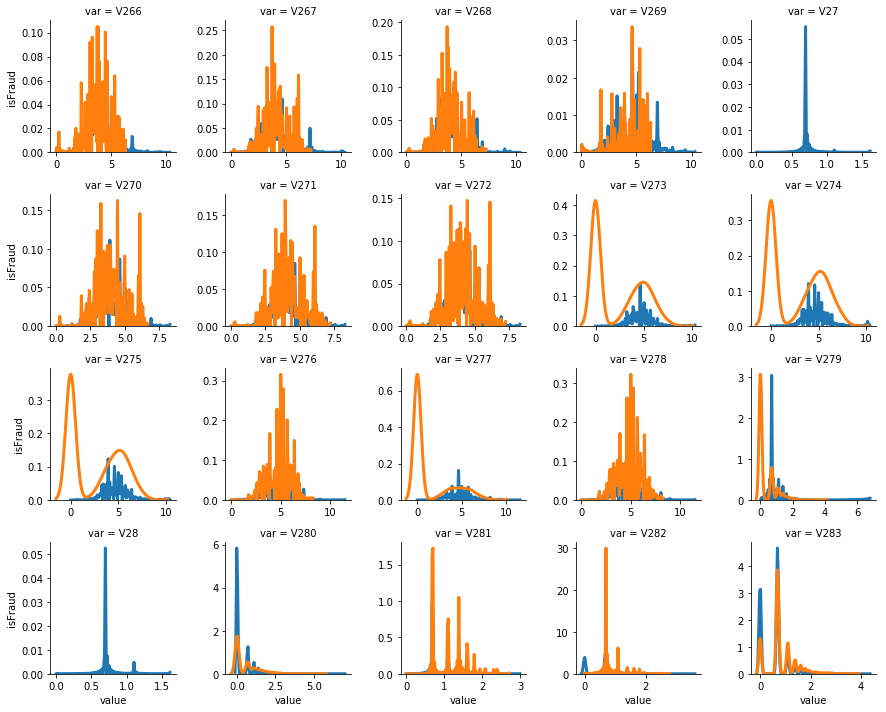

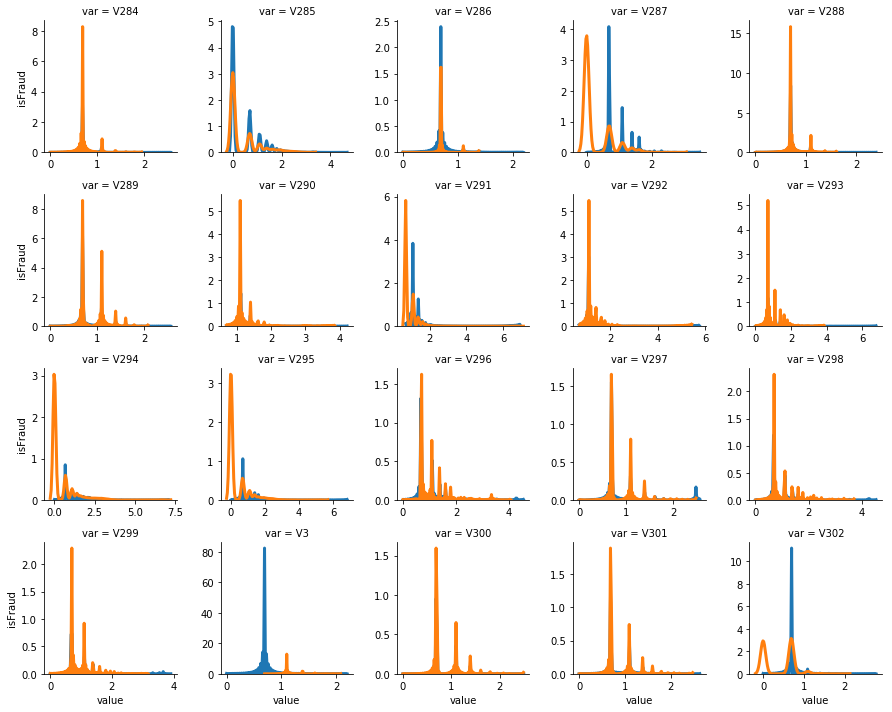

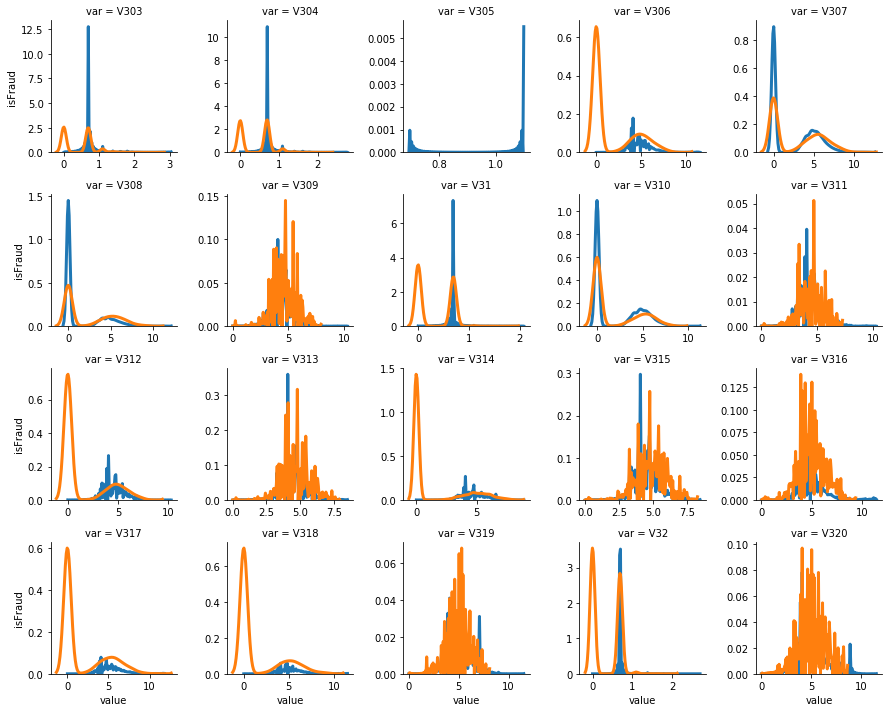

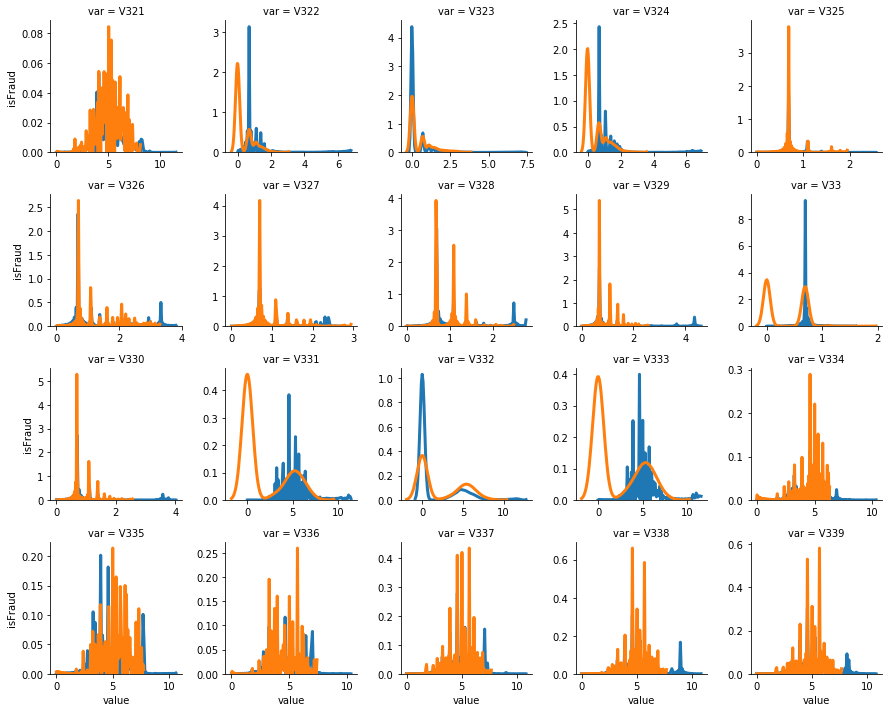

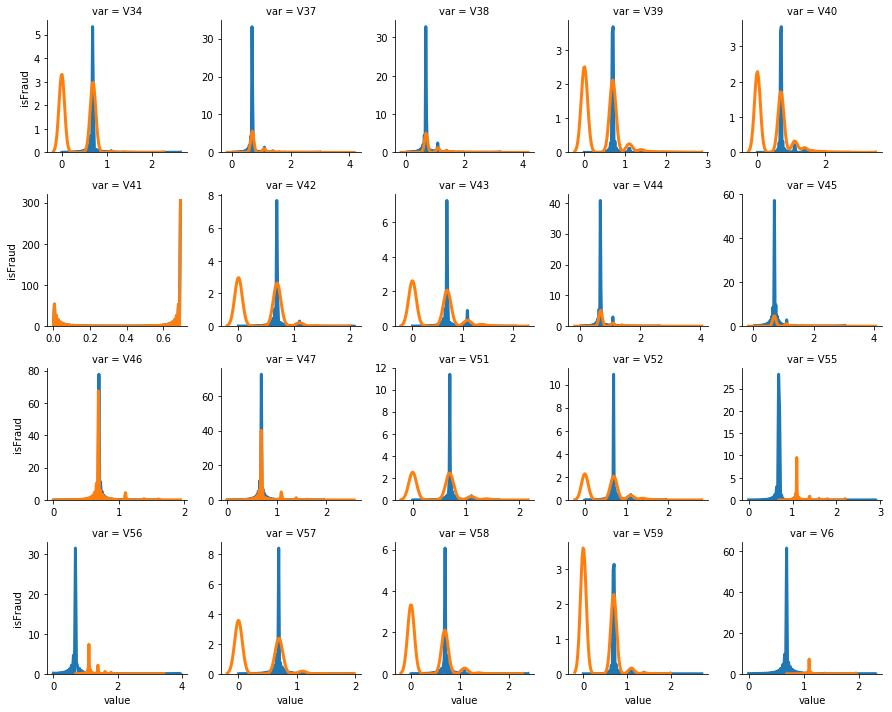

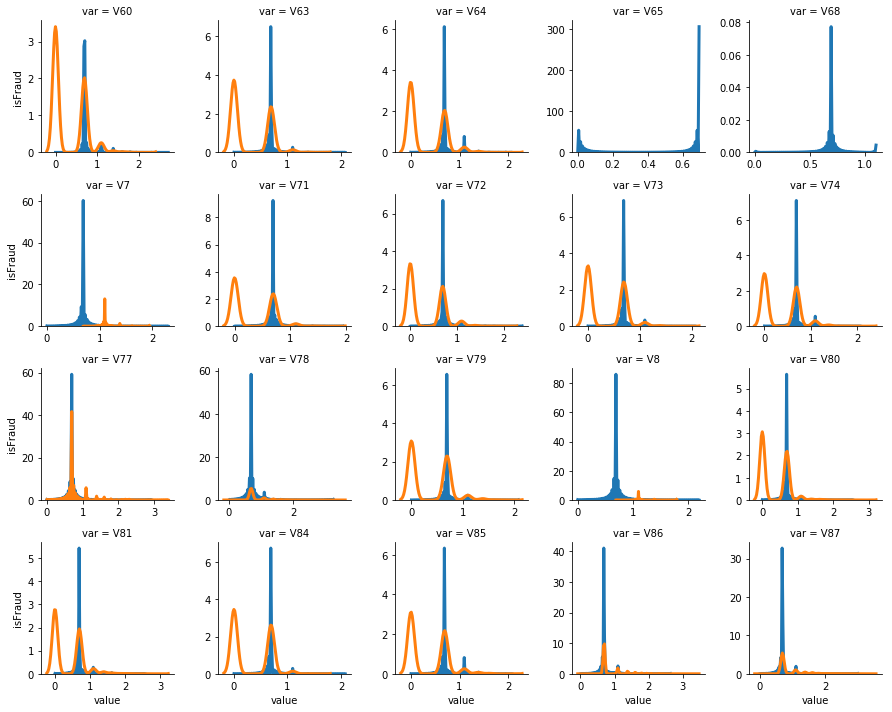

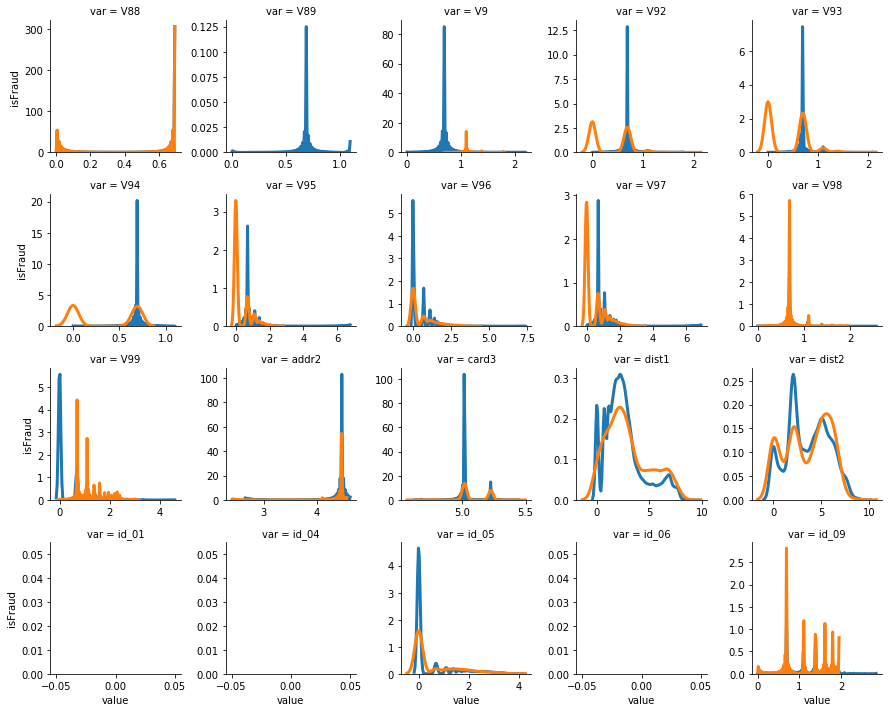

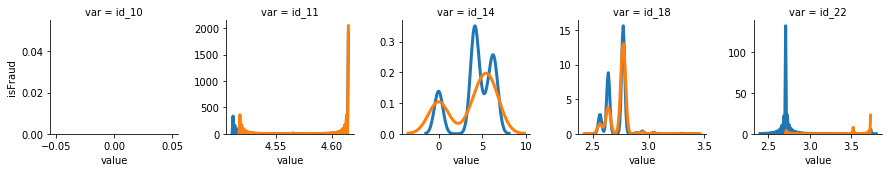

In [27]:
step_size = 20
for i in range(0,len(skewed_vars),step_size):
    df = pd.concat([extract_data(c) for c in skewed_vars[i:(i+step_size)]], axis=0, ignore_index=True)
    g = sns.FacetGrid(df, col="var", col_wrap=5, height=2.5, sharex=False, sharey=False)
    g = g.map(plot_log_density, "value", "isFraud")